<a href="https://colab.research.google.com/github/JoaoGustavo29/Portfolio_DataScience/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Analisando a Violência no Rio de Janeiro

<center><img alt="Dublin" width="75%" src="https://raw.githubusercontent.com/JoaoGustavo29/Relatorios_imgs/main/Camada%201%20(3).png"></center>

Sabe-se que o Rio de Janeiro é conhecido como a **"Cidade Maravilhosa"**, sendo conhecida por ser um dos maiores pontos turisticos do País. 

Apesar das maravilhas do Rio De janeiro, o estado tem altos indices de **violência e tráfico**, problemas os quais a polícia tem dificuldade em vencer. Segundo o resumo [Violência no Rio de Janeiro - Desafio do Estado é vencer o tráfico](https://vestibular.uol.com.br/resumo-das-disciplinas/atualidades/violencia-no-rio-de-janeiro-desafio-do-estado-e-vencer-o-trafico.htm), o tráfico por si só não não justifica o alto índice de criminalidade. 

Praticamente todas as grandes metrópoles do mundo possuem comércio ilegal de drogas. Estima-se que o mercado consumidor de cocaína em Nova York, por exemplo, seja **duas vezes maior** que o Rio.

Entretanto, o Rio é uma das poucas cidades do mundo que presencia cenas de guerra nas ruas quase que diariamente. O motivo são as facções armadas que travam lutas pelo controle de territórios, favorecidas por uma rede de corrupção e pelo descaso histórico do poder público em relação às favelas nos morros cariocas.

# Rio de Janeiro 

O Rio de Janeiro é uma grande cidade brasileira à beira-mar, famosa pelas praias de **Copacabana** e **Ipanema**, pela estátua de 38 *metros* de altura do **Cristo Redentor**, no topo do Corcovado, e pelo Pão de Açúcar, um pico de granito com teleféricos até seu cume. A cidade também é conhecida pelo empolgante **Carnaval**, com carros alegóricos, fantasias extravagantes e sambistas, é considerado o maior do mundo. Tão marcantes quanto Cristo ou o Pão de Açúcar na paisagem carioca, as favelas se espalham pelos morros do Rio. Segundo dados do [Censo2010](https://censo2010.ibge.gov.br/), existem 160 bairros urbanizados e 763 favelas, nas quais vivem mais de 1 milhão e 300 mil pessoas, quase um quarto da população municipal.




## Obtenção dos Dados

Os dados usados foram obtidos a partir do site do [ISP Dados.RJ](http://www.ispdados.rj.gov.br/estatistica.html) (Instituto de Segurança Pública do Rio de Janeiro).

O *dataset* que será utilizado na análise é um arquivo`.csv`

* `DOMensalEstadoDesde1991.csv` - *Estatísticas de segurança: série histórica mensal no estado desde 01/1991*

### Importando os dados

Aqui iremos importar tanto os dados, assim como também as bibliotecas necessárias para a realização da análise.

In [2]:
# importar pacotes nescessários
import pandas as pd

# importar arquivo DOMensalEstadoDesde1991.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/JoaoGustavo29/datasets/main/DOMensalEstadoDesde1991.csv')

## Análise Inicial dos Dados

Aqui é onde buscamos passar o maior entendimento possível, assim o leitor pode se sentir a vontade quando estiver lendo e absorver com excelência as informações transmitidas.

Um ótimo começo é checarmos como nosso é o nosso *DataFrame*, sendo assim, vamos dar uma olhada em como estao distribuídos nossos dados.

Com apenas algumas linhas de código foi possível notar que os dados estão distribuídos em:

* 361 entradas 
* 56 variáveis

In [ ]:
# Identificar volume de Dados no DataFrame
print('Entradas:\t{}'.format(df.shape[0]))
print('Variáveis:\t{}'.format(df.shape[1]))

Entradas:	361
Variáveis:	56


## Colunas

Vamos dar uma olhada no nome de cada uma das variáveis e construir um dicionário a respeito das variáveis que podem causar confusão na hora de serem interpretadas para entendermos o DataFrame.

In [ ]:
df.columns

Index(['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_

**Dicionário de Variáveis**

* `ano` - Ano da comunicação da ocorrência
* `mes` - Mês da comunicação da ocorrência
* `cvli` - Crimes Violentos Letais Intencionais (lesão corporal seguida de morte)
* `apf` - Auto de Prisão em Flagrante 
* `aaapai` - Auto de apreensão de Adolescente por Prática de Ato Infracional
* `cmp` - Cumprimento de Mandado de Prisão
* `cmba` - Cumprimento de Mandado de Busca e Apreensão
* `hom` - Homicídio e suas classificações

As outras variáveis presentes no *Dataset* são autoexplicativas.

### Tipos de Dados

Em seguida, vamos verificar os tipos de dados presentes em cada uma das variáveis presentes no nosso *DataFrame*

Por termos apenas dados numéricos já era esperado que fossem dos tipos int e float.

In [ ]:
# Checando os tipos de dados das variáveis
df.dtypes

ano                             int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
cvli                          float64
hom_por_interv_policial       float64
letalidade_violenta             int64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_transeunte                int64
roubo_celular                 float64
roubo_em_coletivo               int64
roubo_rua                       int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_comercio                  int64
roubo_residencia                int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubo

**Primeiras Entradas**

Em seguida iremos finalmente dar uma olhadas nas 5 primeiras entradas do nosso DataFrame. 

É possível notar a falta de valores em algumas colunas,  com esses valores ausentes a visualização e a interpretação dos dados fica comprometida, afinal a forma como seriam apresentadas não estariam de acordo com a realidade.


In [ ]:
# Checando as 5 Primeiras Entradas
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,NaN,672,162,3051,NaN,NaN,NaN,967,NaN,381,1348,1174,63,350,188,37,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,3
1,1991,2,732,NaN,17,NaN,NaN,749,175,3421,NaN,NaN,NaN,963,NaN,432,1395,1097,64,357,171,35,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,3
2,1991,3,713,NaN,25,NaN,NaN,738,216,3613,NaN,NaN,NaN,963,NaN,422,1385,1265,71,443,191,43,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,3
3,1991,4,634,NaN,20,NaN,NaN,654,200,3211,NaN,NaN,NaN,1186,NaN,354,1540,1415,81,425,199,36,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,3
4,1991,5,650,NaN,20,NaN,NaN,670,146,3051,NaN,NaN,NaN,931,NaN,335,1266,1449,82,553,231,27,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,3


### Valores Ausentes

Tendo em vista essa ausência de valores, vamos checar quais variáveis possuem valores ausentes e a porcentagem em cada uma delas. Podemos notar que `roubo_bicicleta` e `apf` possuem os maiores percentuais de valores ausentes. 

* `roubo_bicicleta ` -  possui cerca de 76% de seus valores ausente.
*  `apf` - possui quase 50% de seus valores ausente.

Não temos confirmação do motivo dos dados estarem ausentes. Podendo ser decorrente de um erro, falta de contabilidade ou outro motivo, apenas sabemos que apesar da falta de preenchimento o crime aconteceu.

In [27]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

furto_bicicleta               0.764543
roubo_bicicleta               0.764543
posse_drogas                  0.498615
cmba                          0.498615
cmp                           0.498615
aaapai                        0.498615
apf                           0.498615
apreensao_drogas_sem_autor    0.498615
trafico_drogas                0.498615
roubo_cx_eletronico           0.398892
roubo_apos_saque              0.398892
extorsao                      0.398892
sequestro_relampago           0.398892
estelionato                   0.398892
roubo_conducao_saque          0.398892
furto_celular                 0.398892
furto_coletivo                0.398892
estupro                       0.398892
pol_militares_mortos_serv     0.398892
pol_civis_mortos_serv         0.398892
pessoas_desaparecidas         0.365651
encontro_ossada               0.365651
roubo_celular                 0.299169
lesao_corp_culposa            0.265928
registro_ocorrencias          0.265928
sequestro                

## **Cópia do DataFrame 2011-2021**

Agora que temos as informações nescessárias a respeito dos valores faltantes, podemos pensar em analisar apenas os últimos 10 anos e comparar alguns pontos com os dados anteriores a esse período, a fim de obtermos uma análise, o mais condizente possível com a realidade atual.

Para isso, vamos criar uma cópia do *DataFrame* `df_clean = df.copy()` e usaremos os dados referentes ao período **2011-2021** `df_clean = df.query('ano >= 2011')`, a respeito de 2021, temos apenas dados do mês de janeiro, devido ao ano não ter acabado.


In [11]:
# Criando cópia do DataFrame
df_clean = df.copy()

In [29]:
# Consultando dados referentes a 2011-2021
df_clean = df.query('ano >= 2011')

**Verificando se Restou Dados Ausentes**

Em seguida, vamos verificar novamente qual o percentual de valores ausentes em cada uma das colunas.

É possível notar que a quantidade de dados ausentes diminuiu drasticamente, tendo apenas duas variáveis com valores ausentes.

* `roubo_bicicleta e furto_bicicleta` - possuem aproximadamente 30% de seus valores ausente.

In [13]:
# Verificando porcentagem de Dados Ausentes
df_clean.isnull().sum() / df_clean.shape[0]

ano                           0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.000000
latrocinio                    0.000000
cvli                          0.000000
hom_por_interv_policial       0.000000
letalidade_violenta           0.000000
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.000000
hom_culposo                   0.000000
lesao_corp_culposa            0.000000
roubo_transeunte              0.000000
roubo_celular                 0.000000
roubo_em_coletivo             0.000000
roubo_rua                     0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.000000
roubo_conducao_saque          0.000000
roubo_apos_saque              0.000000
roubo_bicicleta          

Vamos checar como ficou o nosso *DataFrame* após buscarmos mais recentes.

Com estes valores, é possível fazer uma análise relevante e relacionar com o que acontece hoje, podemos também ter uma visualização mais didática.

In [30]:
# Checando as 5 primeiras entradas após tratamento dos dados
df_clean.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
240,2011,1,425,5.0,9,439.0,61.0,500,413,8272,396.0,179.0,3923.0,4771,505.0,616,5892,1567,231,409,92,4,1.0,4.0,138.0,NaN,865,9203,1423,2822,763.0,2037.0,NaN,7969,15014,2.0,143.0,14.0,2025.0,1068,428.0,527.0,136.0,1375,1858.0,409.0,867.0,42.0,7403.0,488.0,52,1.0,0.0,0.0,57852.0,3
241,2011,2,368,2.0,7,377.0,39.0,416,379,7844,416.0,187.0,3727.0,4742,516.0,588,5846,1490,234,453,81,3,2.0,8.0,185.0,NaN,835,9137,1227,3130,851.0,2022.0,NaN,7951,15181,0.0,144.0,5.0,2121.0,1094,430.0,521.0,165.0,1288,1874.0,405.0,853.0,41.0,7172.0,451.0,47,2.0,0.0,0.0,57840.0,3
242,2011,3,381,6.0,9,396.0,68.0,464,395,7143,434.0,243.0,3716.0,5215,515.0,621,6351,1544,226,401,129,5,0.0,6.0,162.0,NaN,892,9716,1354,4622,860.0,2215.0,NaN,8249,17300,0.0,148.0,7.0,2267.0,1283,519.0,644.0,153.0,1329,2434.0,501.0,1197.0,62.0,7072.0,521.0,37,3.0,1.0,2.0,62560.0,3
243,2011,4,403,7.0,6,416.0,68.0,484,387,7100,389.0,186.0,3735.0,4687,495.0,598,5780,1491,239,414,105,1,2.0,13.0,178.0,NaN,909,9132,1293,2579,852.0,1933.0,NaN,8132,14789,1.0,144.0,20.0,2119.0,1370,561.0,692.0,157.0,1233,2432.0,552.0,1141.0,70.0,7313.0,469.0,60,1.0,0.0,0.0,58691.0,3
244,2011,5,368,3.0,10,381.0,74.0,455,353,6423,417.0,220.0,3796.0,4640,496.0,559,5695,1462,273,408,88,5,0.0,8.0,173.0,NaN,811,8923,1360,2689,939.0,2054.0,NaN,8195,15237,0.0,222.0,15.0,2636.0,1409,521.0,745.0,185.0,1277,2370.0,556.0,1176.0,75.0,6859.0,452.0,46,6.0,2.0,0.0,59364.0,3


### Informações Estatísticas da Violência no Rio de Janeiro

Para termos um resumo geral das informações estatísticas do nosso *dataset* vamos usar a função `df.describe()`, com ela temos a média de cada um das váriaveis, o desvio padrão, os valores máximos e mínimos, etc.




In [31]:
df_clean.describe()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,85.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,85.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,2015.545455,6.454545,375.917355,3.338843,12.892562,392.148760,77.479339,469.628099,451.884298,6118.404959,438.231405,172.809917,3011.694215,5848.033058,1240.685950,850.157025,7938.876033,2877.628099,544.115702,497.702479,101.173554,1.900826,3.661157,7.537190,106.355372,12.258824,1529.818182,13617.380165,1339.545455,2291.330579,759.404959,1433.338843,133.400000,7577.801653,13495.132231,0.487603,141.528926,9.752066,3009.677686,1863.867769,757.859504,953.495868,189.595041,2072.000000,2739.719008,670.644628,1412.958678,106.090909,5718.851240,443.396694,37.380165,3.082645,1.743802,0.247934,62249.578512,2.966942
std,2.915476,3.488075,60.533130,2.010612,5.555480,64.349911,45.096212,79.465835,82.945885,1290.528410,56.062578,27.269432,919.691586,1605.089992,758.616713,386.482578,2536.404481,1021.637461,247.907718,132.408940,22.040371,1.434137,2.534935,3.775008,43.236724,8.361125,669.941129,4319.270417,136.714118,931.304769,200.726828,336.947240,78.179159,1082.986216,2364.348927,0.931984,30.599312,4.724548,623.798568,332.587355,176.312190,173.141518,38.775331,669.565307,336.007297,210.853459,312.845633,75.927378,1342.998366,87.197236,11.837269,2.253097,1.573366,0.520913,7403.395556,0.179531
min,2011.000000,1.000000,239.000000,0.000000,2.000000,249.000000,15.000000,297.000000,272.000000,2429.000000,241.000000,111.000000,584.000000,2260.000000,301.000000,345.000000,3298.000000,1439.000000,221.000000,169.000000,38.000000,0.000000,0.000000,1.000000,11.000000,0.000000,782.000000,7315.000000,904.000000,255.000000,105.000000,305.000000,0.000000,3089.000000,5722.000000,0.000000,49.000000,1.000000,717.000000,1068.000000,372.000000,521.000000,106.000000,991.000000,1858.000000,308.000000,544.000000,2.000000,1409.000000,178.000000,16.000000,0.000000,0.000000,0.000000,31231.000000,2.000000
25%,2013.000000,3.000000,331.000000,2.000000,9.000000,343.000000,41.000000,414.000000,380.000000,5299.000000,404.000000,153.000000,2350.000000,4562.000000,496.000000,537.000000,5720.000000,2026.000000,328.000000,408.000000,91.000000,1.000000,2.000000,5.000000,68.000000,5.000000,989.000000,9714.000000,1266.000000,1597.000000,682.000000,1302.000000,103.000000,7184.000000,12475.000000,0.000000,123.000000,7.000000,2673.000000,1706.000000,638.000000,842.000000,163.000000,1483.000000,2501.000000,490.000000,1233.000000,55.000000,4706.000000,400.000000,27.000000,1.000000,1.000000,0.000000,59844.000000,3.000000
50%,2016.000000,6.000000,374.000000,3.000000,12.000000,391.000000,62.000000,468.000000,457.000000,6249.000000,433.000000,171.000000,3056.000000,5692.000000,1103.000000,

**Média das variáveis `roubo_veiculo`, `furto_veiculos` e `recuperacao_veiculos`:**

Podemos ver a média de cada uma das variáveis e termos alguns insights, vamos dar uma olhada:

  * `roubo_veiculo` - Em média, aproximadamente 2878 veículos foram roubados

  * `furto_veiculos` - Em média, aproximadamente 1340 veículos foram furtados

  * `recuperacao_veiculos` - Em média, aproximadamente 2072 veículos foram recuperados

In [18]:
# Verificando a média de veículos roubados
df_clean.roubo_veiculo.mean()

2877.628099173554

In [19]:
# Verificando a média de veículos furtados
df_clean.furto_veiculos.mean()

1339.5454545454545

In [20]:
# Verificando a média de veículos recuperados
df_clean.recuperacao_veiculos.mean()

2072.0

**Porcentagem de Carros Recuperados em Relação aos Carros Roubados e Carros Furtados**

É possível calcularmos a porcentagem de carros recuperados em relação aos carros roubado e carros furtados:

* A porcentagem de veículos recuperados é aproximadamente 50%

In [32]:
# Calculando a porcentagem de carros recuperados em relação a carros roubados e carros furtados
df_clean.recuperacao_veiculos.sum() / (df_clean.roubo_veiculo.sum() + df_clean.furto_veiculos.sum())

0.49132433693006555

**Valores Máximo e Mínimo para a Variável `hom_doloso`**

Podemos também encontrar o mês e o ano onde teve a maior e a menor quantidade de casos de um determinado crime, vamos verificar a respeito da variável `hom_doloso`

**Valor Máximo para a Variável `hom_doloso` 2011-2021**

* `Março de 2014` - Foi o mês com a maior quantidade de casos de homicídio doloso, foram 510 ocorrências no total.





In [22]:
# Localizando o valor máximo da variável 'hom_doloso'
df_clean.loc[df_clean['hom_doloso'] == df_clean.hom_doloso.max()]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
278,2014,3,510,5.0,10,525.0,46.0,571,544,8357,479.0,214.0,3938.0,7014,555.0,639,8208,2947,401,773,125,2,4.0,16.0,94.0,0.0,1141,13711,1640,4564,974.0,1577.0,0.0,9248,18003,1.0,175.0,17.0,2745.0,2046,871.0,1002.0,228.0,2355,3154.0,1077.0,1533.0,60.0,8154.0,563.0,59,2.0,5.0,0.0,72915.0,3


**Valor Máximo no Dataset para a Variável `hom_doloso` 1991-2021**

Com fins de comparação, a maior quantidade de casos de homicídio doloso presente no nosso *dataset* :

* `Janeiro de 1995` - Foi o mês com a maior quantidade de casos de homicídio doloso, foram 831 ocorrências no total. 

In [37]:
# Localizando o valor máximo da variável 'hom_doloso' 
df.loc[df['hom_doloso'] == df.hom_doloso.max()]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,NaN,848,166,3626,NaN,NaN,NaN,1056,NaN,377,1433,2060,188,323,174,38,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,NaN,3


**Valor Mínimo para a Variável `hom_doloso`**

* `Setembro de 2020` -  Foi o mês com a menor quantidade de casos de homicídio doloso, 239 ocorrências no total. 

Se levarmos em consideração que a maior ocorrência foi 6 anos antes da menor, podemos notar que ainda temos uma alta quantidade de casos.

Essa é a menor quantidade de casos desde 1991.


In [34]:
# Localizando o valor mínimo da variável 'hom_doloso'
df_clean.loc[df_clean['hom_doloso'] == df_clean.hom_doloso.min()]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
356,2020,9,239,3.0,7,249.0,54.0,303,343,4560,481.0,171.0,1675.0,3567,1319.0,582,5468,1742,323,294,61,0,4.0,2.0,57.0,27.0,1146,9124,1065,698,379.0,823.0,132.0,5888,8985,1.0,105.0,5.0,4086.0,1984,974.0,890.0,150.0,1173,2497.0,455.0,1059.0,37.0,4094.0,297.0,22,1.0,0.0,0.0,48732.0,3


### Visualização de Dados

Após o tratamento dos dados, a análise dos dados e os insigths que obtivemos, podemos plotar gráficos para visualizarmos os dados dispostos de outra maneira.

**Histograma de `hom_doloso`**

o histograma plotado nos mostra que existem extremos quando se trata da quantidade de casos, mas em sua maioria a ocorrência fica entre 340 e 400 casos por mês.

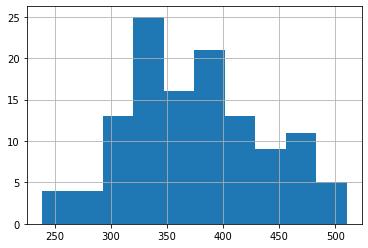

In [38]:
df_clean['hom_doloso'].hist();

**Gráfico de linhas para a variável `roubo_em_coletivo`**

O gráfico de linhas nos mostra que o roubo em coletivo esta aumentando desde 2012, quando os números eram próximos de 345 a partir de 2015 houve um aumento de aproximadamente 372%, uma vez que a quantidade de roubos em coletivo ultrapassou 1600 casos em **Agosto de 2017**

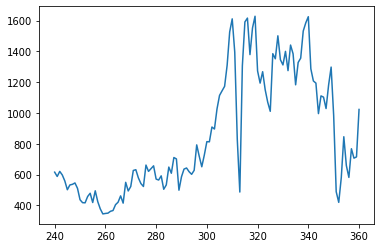

In [102]:
df_clean['roubo_em_coletivo'].plot();

**Valor Mínimo para a Variável `roubo_em_coletivo` 2011-2021**

In [96]:
# Localizando o número minimo de roubos em coletivo
df_clean.loc[df_clean['roubo_em_coletivo'] == df_clean.roubo_em_coletivo.min()]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
259,2012,8,294,1.0,11,306.0,44.0,350,349,7328,515.0,220.0,4221.0,4041,371.0,345,4757,1751,328,422,100,2,3.0,7.0,167.0,NaN,919,8456,1309,2552,888.0,1647.0,NaN,8332,14728,2.0,140.0,7.0,3248.0,1644,665.0,813.0,206.0,1395,2361.0,627.0,1515.0,53.0,7025.0,517.0,51,1.0,0.0,0.0,60926.0,3


**Valor Máximo para a Variável `roubo_em_coletivo` 2011-2021**

In [97]:
# Localizando o número máximo de roubos em coletivo
df_clean.loc[df_clean['roubo_em_coletivo'] == df_clean.roubo_em_coletivo.max()]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
319,2017,8,397,4.0,16,417.0,70.0,487,528,5230,433.0,178.0,2576.0,8815,2417.0,1628,12860,4613,843,649,111,2,1.0,6.0,79.0,4.0,2638,21806,1318,1754,757.0,1340.0,183.0,7768,13120,0.0,145.0,11.0,2988.0,1887,725.0,1016.0,182.0,3494,2833.0,623.0,1818.0,222.0,4701.0,420.0,42,5.0,2.0,1.0,70380.0,3


## Conclusão

Após a análise, fui capaz de observar que em **10 anos** alguns dados mudaram, mas infelizmente existem setores que ainda são alarmantes, uma vez que seus números ainda são muito altos. Existem também dados onde houve a diminuição dos casos, mas após um curto período de tempo voltaram a subir e continuam altos. 

Entretanto, cabe ao Governo e a Força Policial do Rio De Janeiro tornar a cidade mais segura e  fazer com que o lar da estátua do **Cristo Redentor** cada vez mais seja atrativo até mesmo para as pessoas que conhecem o Rio como um lugar violento, seja por meio de mais patrulhas, mais homens nas ruas e forças tarefas para combater as facções armadas, a população precisa disso, o País nescessita que a **"Cidade Maravilhosa"** seja realmente maravilhosa.

Consequentemente, o turismo pode aumentar e o medo diminuir, isso seria ótimo para o Estado, uma vez que tem passado por dificuldades, devido aos últimos anos, resolvendo esse problema talvez ocorra um efeito dominó e não apenas o setor da segurança melhore, mas outros também.